In [151]:
%load_ext autoreload
%autoreload 2

import os
import sys

# Ruta absoluta al directorio principal del proyecto
proyecto_path = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Agregar la ruta al sistema
if proyecto_path not in sys.path:
    sys.path.append(proyecto_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import json

In [153]:
df_raw = pd.read_csv('../data/raw/data_v1.csv', sep=';')
df_raw.head()

,WEB_PROPERTY_CODE,PRICE,PRICE_ADMIN_INCLUDED,AREA,LATITUDE,LONGITUDE,ANTIQUITY,CONSTRUCTION_YEAR,BUILT_AREA,PRIVATE_AREA,GARAGE,BATHROOMS,ROOMS,FLOOR,PROPERTY_TYPE,OPERATION_TYPE,STRATUM,BEDROOMS
0,191629124,15500000,18249000,257.0,4.665251,-74.050198,De 9 a 15 años,NaN,257.0,257.0,4,5,0,3.0,Apartamento,Arriendo,6,3
1,192549829,5120000,5800000,60.0,4.675201,-74.051801,De 1 a 8 años,NaN,60.0,54.0,1,1,0,4.0,Apartamento,Arriendo,6,1
2,192746999,5200000,6245000,160.0,4.731060,-74.072497,De 9 a 15 años,NaN,160.0,0.0,2,4,0,7.0,Apartamento,Arriendo,5,3
3,191065657,802100,1000000,60.0,4.587946,-74.161613,NaN,NaN,60.0,60.0,1,2,0,0.0,Apartamento,Arriendo,3,3
4,192554598,28000000,28000000,608.0,4.658032,-74.049014,De 1 a 8 años,NaN,608.0,608.0,4,4,4,0.0,Apartamento,Arriendo,6,4


In [154]:
with open('../src/config.json', 'r') as f:
    config_dict = json.load(f)

y_column = config_dict['y_column']
numeric_features = config_dict['numeric_features']
categorical_features = config_dict['categorical_features']
all_features = numeric_features + categorical_features

# Keep PROPERTY_TYPE temporarily for filtering
df = df_raw.loc[:,y_column + all_features]

# Antes

In [155]:
# Data Analysis and Quality Check
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99]).T.map(lambda x: f"{x:,.0f}")

Dataset shape: (11863, 14)

Data types:
PRICE              int64
AREA             float64
BUILT_AREA       float64
PRIVATE_AREA     float64
LATITUDE         float64
LONGITUDE        float64
FLOOR            float64
ROOMS              int64
BATHROOMS          int64
GARAGE             int64
STRATUM            int64
BEDROOMS           int64
ANTIQUITY         object
PROPERTY_TYPE     object
dtype: object

Missing values:
PRICE              0
AREA               0
BUILT_AREA         6
PRIVATE_AREA       0
LATITUDE           0
LONGITUDE          0
FLOOR            142
ROOMS              0
BATHROOMS          0
GARAGE             0
STRATUM            0
BEDROOMS           0
ANTIQUITY        674
PROPERTY_TYPE      0
dtype: int64

Basic statistics:


,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
PRICE,"11,863","17,174,589","883,670,478",0,"700,000","1,000,000","1,200,000","1,700,000","3,500,000","8,000,000","17,000,000","25,000,000","59,276,283","96,000,000,000"
AREA,"11,863",493,"38,105",0,10,25,33,46,74,152,280,400,894,"4,150,000"
BUILT_AREA,"11,857",494,"38,115",0,10,25,33,46,74,152,280,400,894,"4,150,000"
PRIVATE_AREA,"11,863",114,581,0,0,0,0,29,58,118,245,350,736,"44,739"
LATITUDE,"11,863",5,0,0,5,5,5,5,5,5,5,5,5,8
LONGITUDE,"11,863",-74,1,-77,-74,-74,-74,-74,-74,-74,-74,-74,-74,0
FLOOR,"11,721",3,7,-1,0,0,0,0,1,4,7,10,18,603
ROOMS,"11,863",1,1,0,0,0,0,0,1,2,3,3,4,20
BATHROOMS,"11,863",2,1,0,0,0,1,1,2,3,4,5,6,10
GARAGE,"11,863",1,4,-3,0,0,0,0,1,2,3,3,6,127


In [156]:
for c in categorical_features:
    print(df[c].value_counts(dropna=False))
    print('-'*10)
print()
print("="*40)
print("Variables continuas")
print("="*40)
print()
for c in numeric_features:
    n_nans = df[c].isna().sum()
    if n_nans > 0:
        print(f"Total NaN in {c}: {n_nans} and {n_nans * 100 / len(df):,.2f}%")

ANTIQUITY
De 16 a 30 años    3409
De 1 a 8 años      2584
Más de 30 años     2078
De 9 a 15 años     2043
Menor a 1 año      1075
NaN                 674
Name: count, dtype: int64
----------
PROPERTY_TYPE
Apartamento      8483
Apartaestudio    3380
Name: count, dtype: int64
----------

Variables continuas

Total NaN in BUILT_AREA: 6 and 0.05%
Total NaN in FLOOR: 142 and 1.20%


<Axes: xlabel='PRICE', ylabel='Count'>

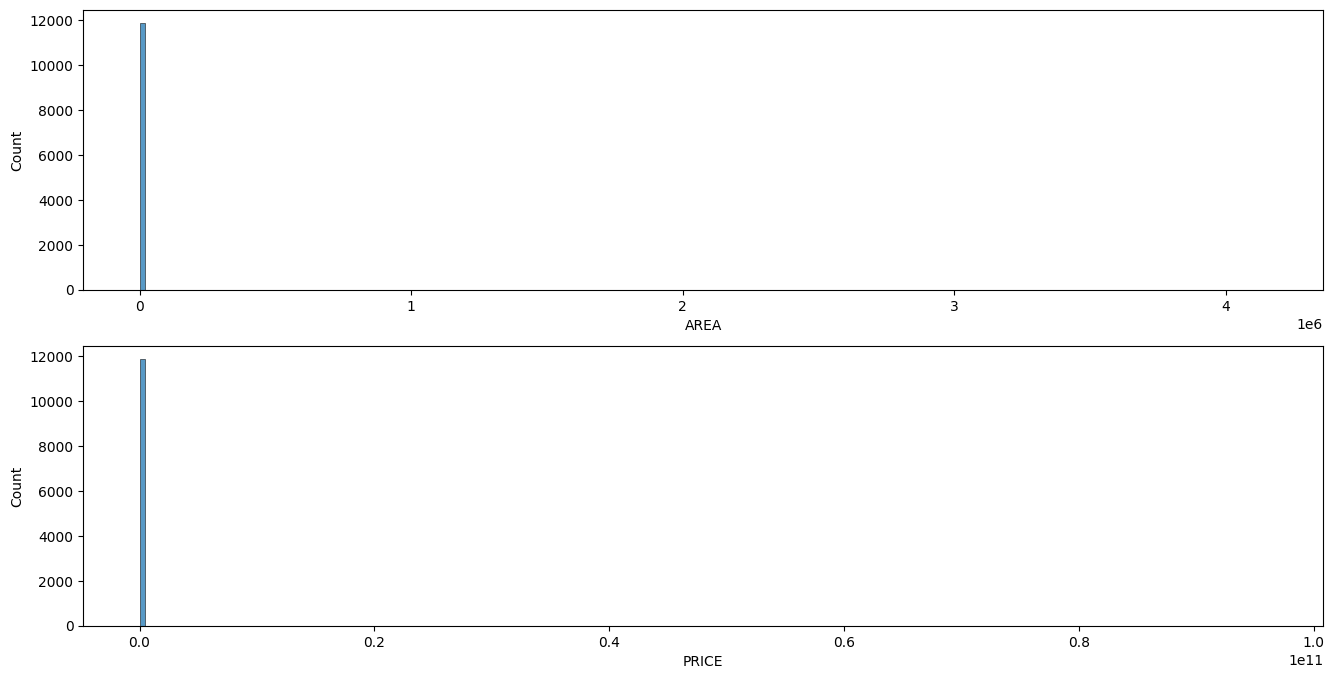

In [157]:
# TODO: CAMBIAR POR FUNCIONES DEDICADAS E SU PROPIO MODULO EN SRC
fig, axes = plt.subplots(2, 1, figsize = (16,8))

sns.histplot(x = df['AREA'], ax = axes[0])
sns.histplot(x = df['PRICE'], ax = axes[1])

/home/golo/Documents/Proyectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/golo/Documents/Proyectos/InmueblesApp/.venv/lib64/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


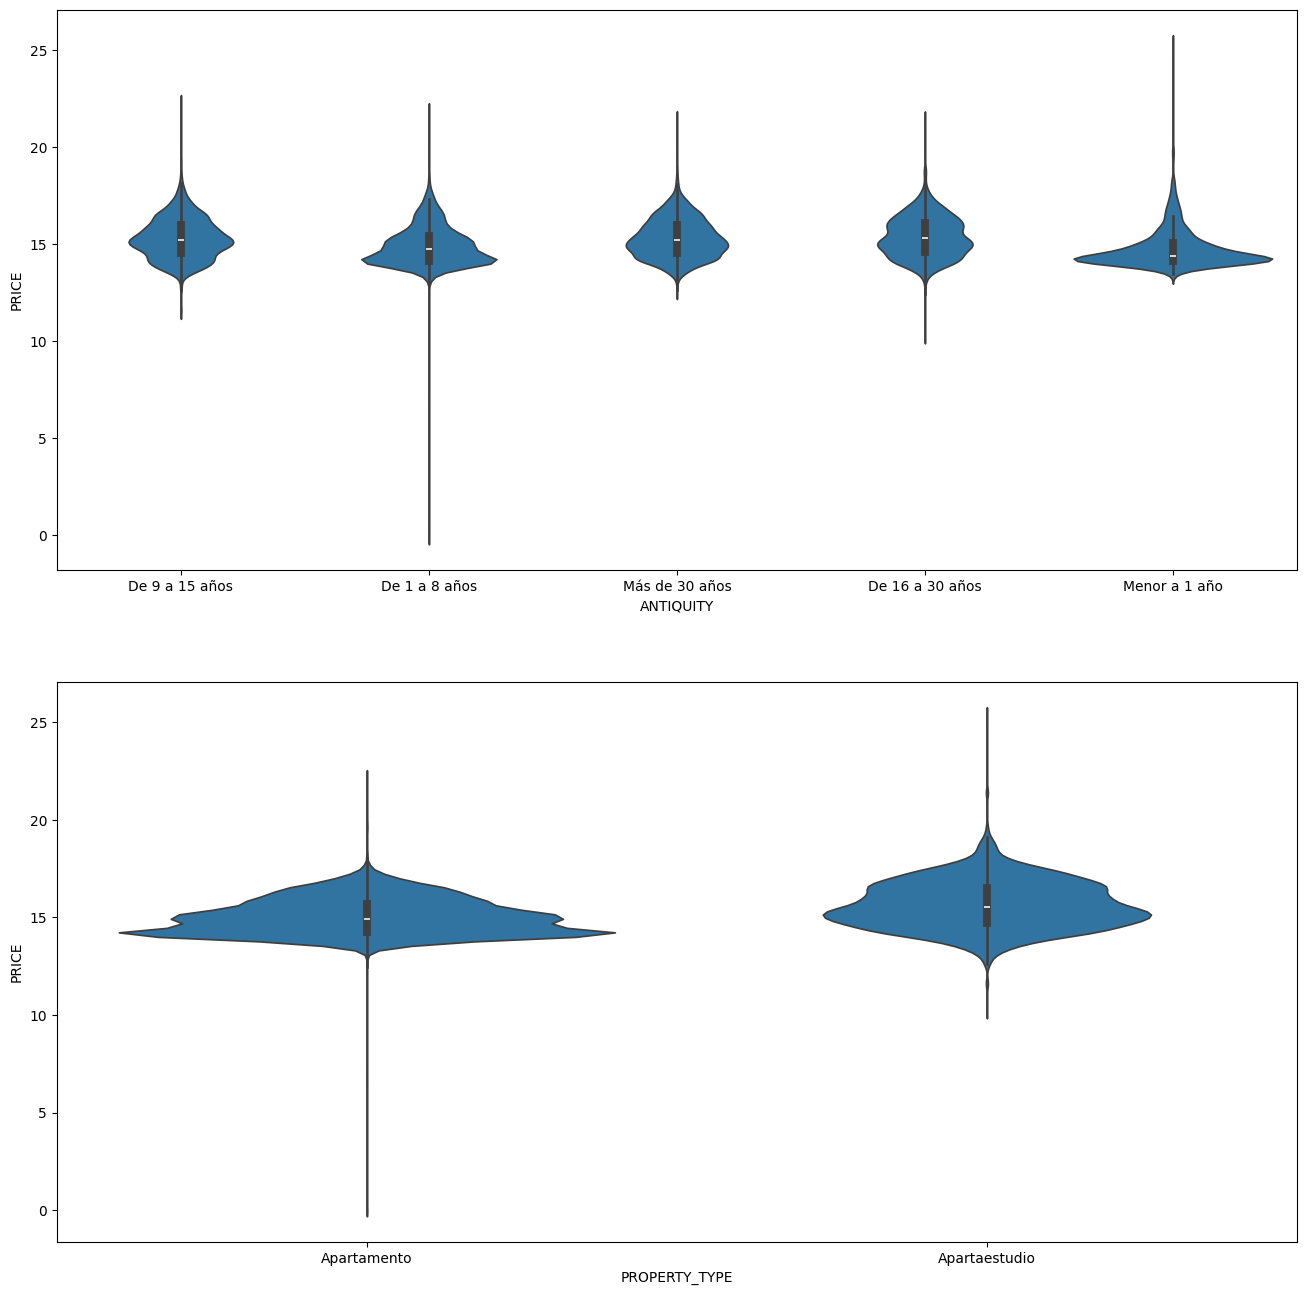

In [158]:
# TODO: CAMBIAR POR FUNCIONES DEDICADAS E SU PROPIO MODULO EN SRC

fig, axes = plt.subplots(len(categorical_features), 1, figsize = (16, 8 * len(categorical_features)))

if len(categorical_features) > 1:
    for i, var in enumerate(categorical_features):
        sns.violinplot(df, x = var, y = np.log(df['PRICE']), ax = axes[i])

else:
    sns.violinplot(df, x = categorical_features[0], y = np.log(df['PRICE']), ax = axes)

# Limpieza Pre Preprocesamiento

In [159]:
# Categorical features can"t have NaN
for c in categorical_features:

    # Default Value for Nan numeric
    if pd.api.types.is_numeric_dtype(df[c]):
        df[c] = df[c].fillna(999)

    # Devault Value for Nan String
    elif pd.api.types.is_object_dtype(df[c]):
        df[c] = df[c].fillna('No se sabe')

df[categorical_features] = df[categorical_features].astype('category')

# Drop erroneous data
df = df.loc[df['FLOOR'] != 202]
df = df.loc[df['STRATUM'] != 101]

# Apply area and price filters only for Apartamento and Apartaestudio
apartment_mask = df['PROPERTY_TYPE'].isin(['Apartamento', 'Apartaestudio'])
df.loc[apartment_mask] = df.loc[apartment_mask
                                & (df['AREA'] < 400)
                                & (df['AREA'] > 0)
                                & (df['PRICE'] < 20_000_000)
                                & (df['PRICE'] > 100_000)]

# Drop remaining NaN
df.dropna(inplace=True)

print(f"Se removieron {len(df_raw) - len(df):,} observacion. un total del {(len(df_raw) - len(df)) * 100/len(df_raw):,.0f}% de la muestra original")
print(df.dtypes)
df.head(3)

Se removieron 1,222 observacion. un total del 10% de la muestra original
PRICE             float64
AREA              float64
BUILT_AREA        float64
PRIVATE_AREA      float64
LATITUDE          float64
LONGITUDE         float64
FLOOR             float64
ROOMS             float64
BATHROOMS         float64
GARAGE            float64
STRATUM           float64
BEDROOMS          float64
ANTIQUITY        category
PROPERTY_TYPE    category
dtype: object


,PRICE,AREA,BUILT_AREA,PRIVATE_AREA,LATITUDE,LONGITUDE,FLOOR,ROOMS,BATHROOMS,GARAGE,STRATUM,BEDROOMS,ANTIQUITY,PROPERTY_TYPE
0,15500000.0,257.0,257.0,257.0,4.665251,-74.050198,3.0,0.0,5.0,4.0,6.0,3.0,De 9 a 15 años,Apartamento
1,5120000.0,60.0,60.0,54.0,4.675201,-74.051801,4.0,0.0,1.0,1.0,6.0,1.0,De 1 a 8 años,Apartamento
2,5200000.0,160.0,160.0,0.0,4.731060,-74.072497,7.0,0.0,4.0,2.0,5.0,3.0,De 9 a 15 años,Apartamento


<Axes: xlabel='PRICE', ylabel='Count'>

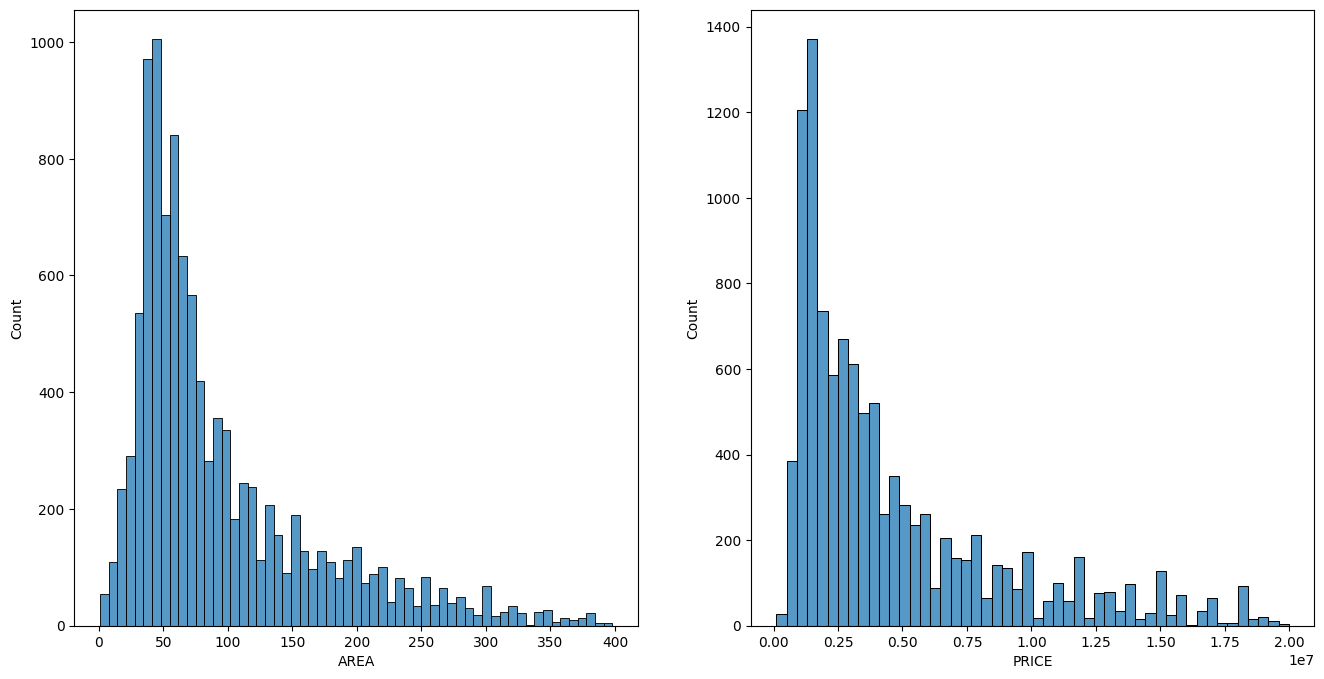

In [160]:
# TODO: CAMBIAR POR FUNCIONES DEDICADAS E SU PROPIO MODULO EN SRC
fig, axes = plt.subplots(1, 2, figsize = (16,8))

sns.histplot(x = (df['AREA']), ax = axes[0])
sns.histplot(x = (df['PRICE']), ax = axes[1])

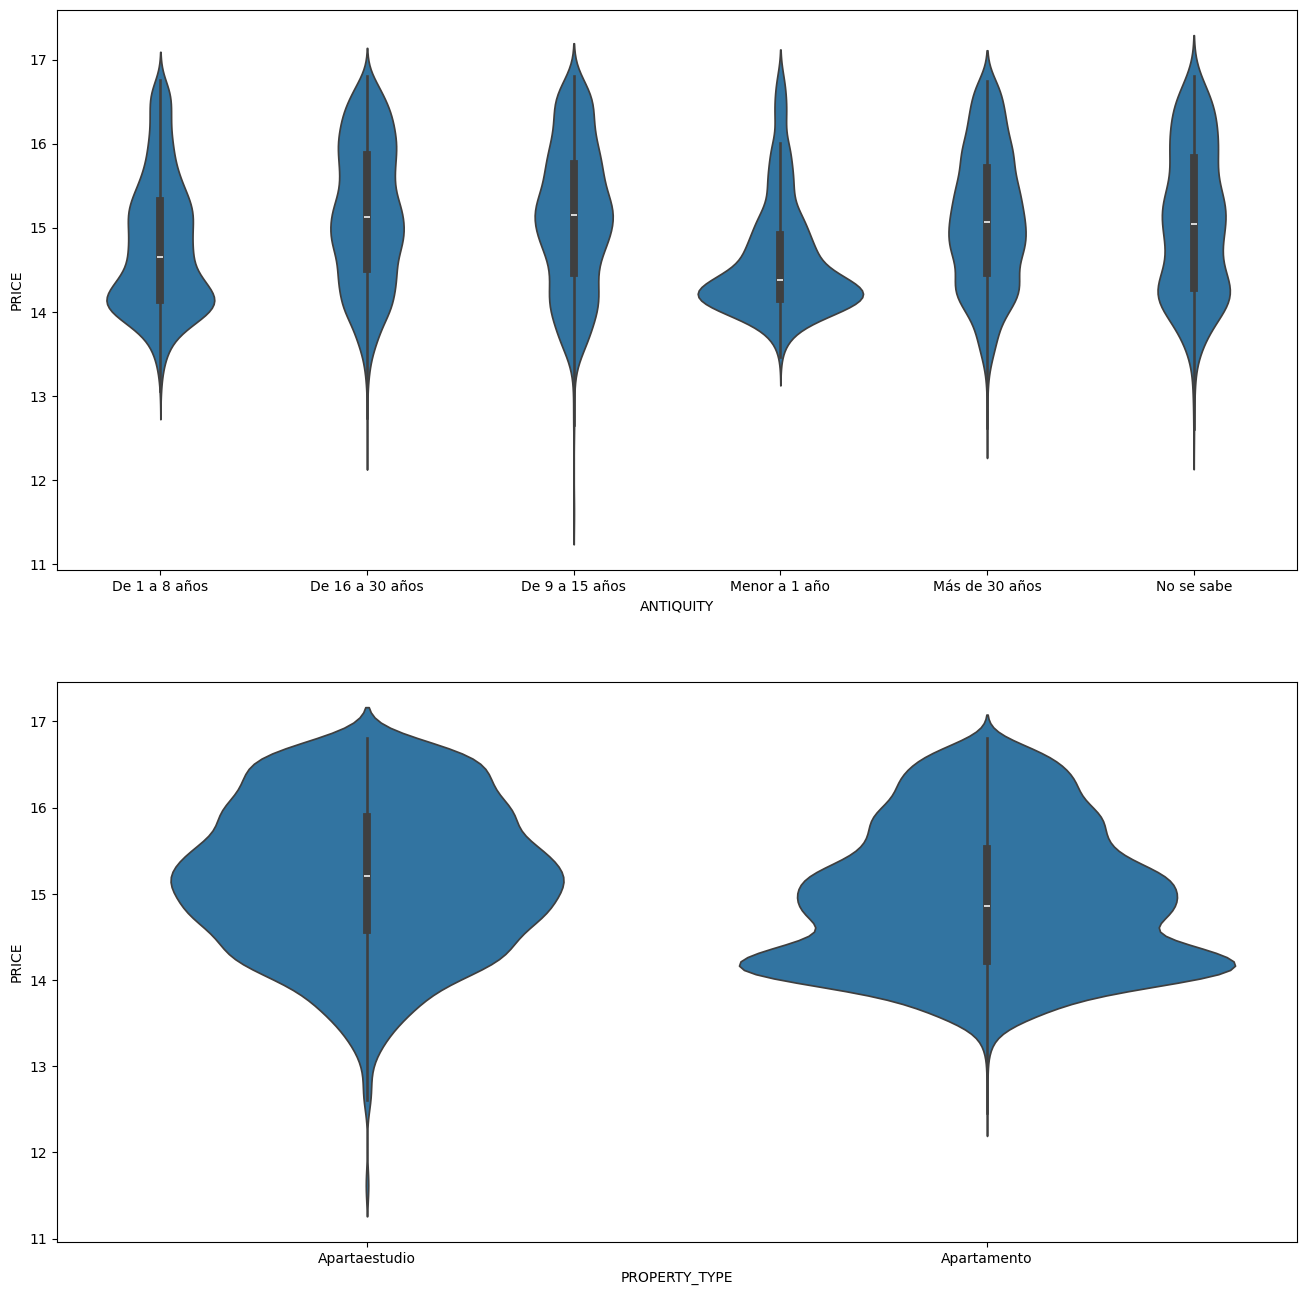

In [161]:
# TODO: CAMBIAR POR FUNCIONES DEDICADAS E SU PROPIO MODULO EN SRC

fig, axes = plt.subplots(len(categorical_features), 1, figsize = (16, 8 * len(categorical_features)))
for i, var in enumerate(categorical_features):
    sns.violinplot(df, x = var, y = np.log(df['PRICE']), ax = axes[i])

In [162]:
df.to_csv('../data/interim/data_v2.csv', index=False, sep=';')